Write a report after performing histogram equalization operation from scratch. Compare results of your own histogram equalization function with cv2's built-in function.

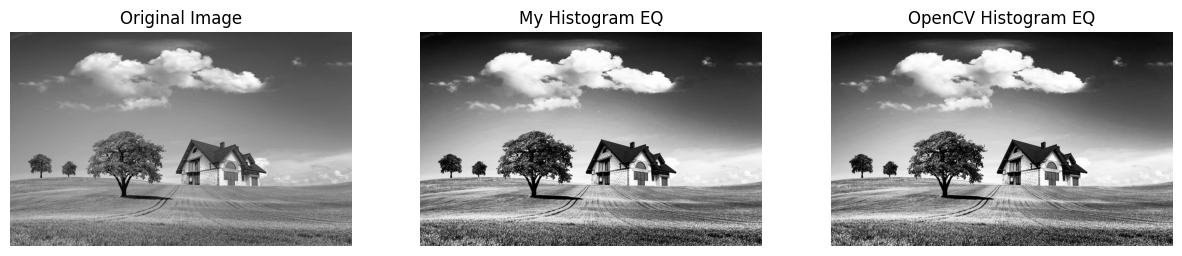

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('nature3.png', cv2.IMREAD_GRAYSCALE)

def my_hist_eq(image):
    # Flatten image to 1D array
    flat = image.flatten()

    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    
    # Normalize CDF to 0-255
    cdf_normalized = ((cdf - cdf.min()) * 255) // (cdf.max() - cdf.min())

    img_eq = cdf_normalized[flat].reshape(image.shape).astype(np.uint8)
    
    return img_eq

# Apply our histogram equalization
img_eq_my = my_hist_eq(img)

img_eq_cv2 = cv2.equalizeHist(img)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')


plt.subplot(1,3,2)
plt.title('My Histogram EQ')
plt.imshow(img_eq_my, cmap='gray')

plt.subplot(1,3,3)
plt.title('OpenCV Histogram EQ')
plt.imshow(img_eq_cv2, cmap='gray')

plt.show()


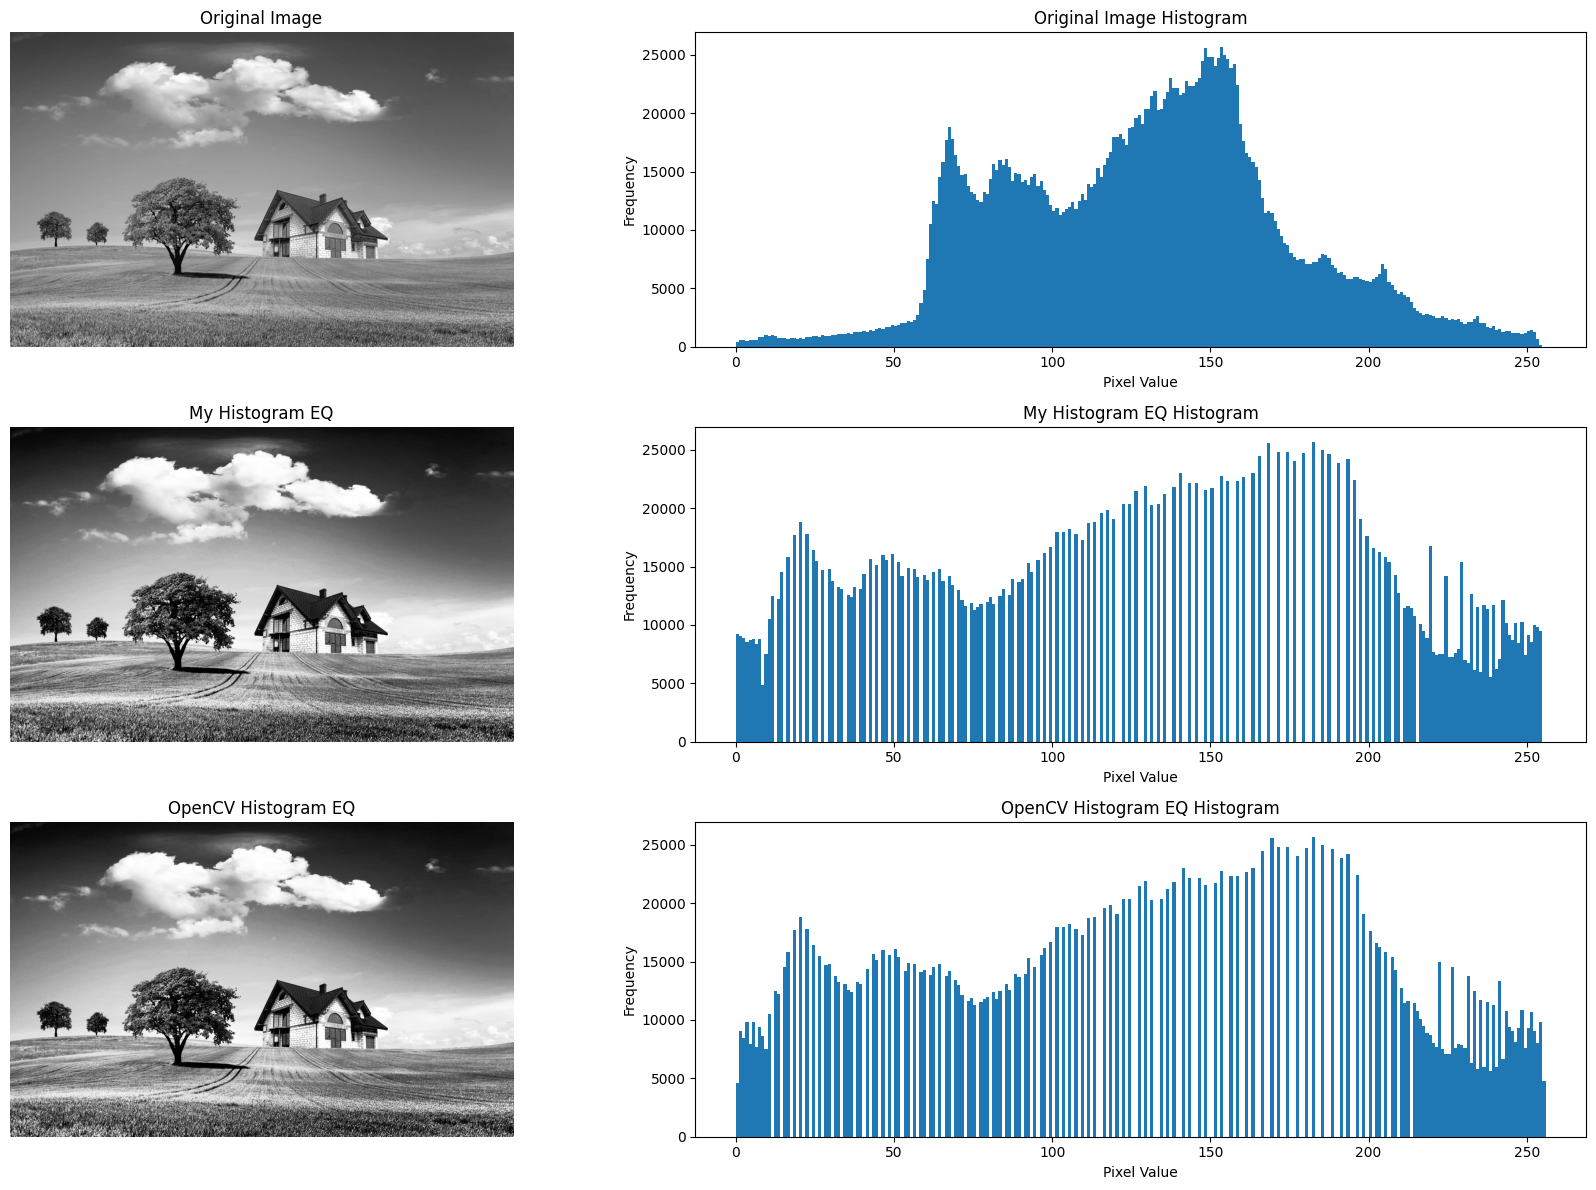

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Load grayscale image ---
img = cv2.imread('nature3.png', cv2.IMREAD_GRAYSCALE)

# --- Custom histogram equalization function ---
def my_hist_eq(image):
    flat = image.flatten()
    hist, bins = np.histogram(flat, 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = ((cdf - cdf.min()) * 255) // (cdf.max() - cdf.min())
    img_eq = cdf_normalized[flat].reshape(image.shape).astype(np.uint8)
    return img_eq

# --- Apply histogram equalization ---
img_eq_my = my_hist_eq(img)
img_eq_cv2 = cv2.equalizeHist(img)

# --- Plot images and their histograms ---
plt.figure(figsize=(18,12))

titles = ['Original Image', 'My Histogram EQ', 'OpenCV Histogram EQ']
images = [img, img_eq_my, img_eq_cv2]

for i in range(3):
    # Show image
    plt.subplot(3,2,2*i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
   
    
    # Show histogram
    plt.subplot(3,2,2*i+2)
    plt.hist(images[i].ravel(), bins=256, range=[0,256])
    plt.title(titles[i] + ' Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
